## Regression on California House prices

You can load the California housing dataset using sklearn.datasets.fetch_california_housing.

```
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
housing=pd.DataFrame(data['data'],columns=data['feature_names'])
housing['target']=data['target']
```
You can find a description of the data here: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Alternatively, you can use the zipped data that is shared with you. 


In [1]:
# importing data and printing out table
from sklearn.datasets import fetch_california_housing
import pandas as pd
data=fetch_california_housing()
housing=pd.DataFrame(data['data'],columns=data['feature_names'])
housing['target']=data['target']

housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


1.1 Visualize the univariate distribution of each feature, and the distribution of the target. Do you notice anything? Is something that you think might require special treatment (comment what it is, you’re not required to try to fix it).

#### MedInc seems to be inversely related where the larger the MedInc the smaller the target. On the other hand, HouseAge seems to be directly related to the target where target increases as HouseAge increases to some extend until it falls again. AveRooms, AveBedrms, Population, and AveOccup graphs may require speical treatment because the graphs reveal that there may be some outliers that are causing the scaling of the graphs to be unuseful.

Univariate Distribution of Features


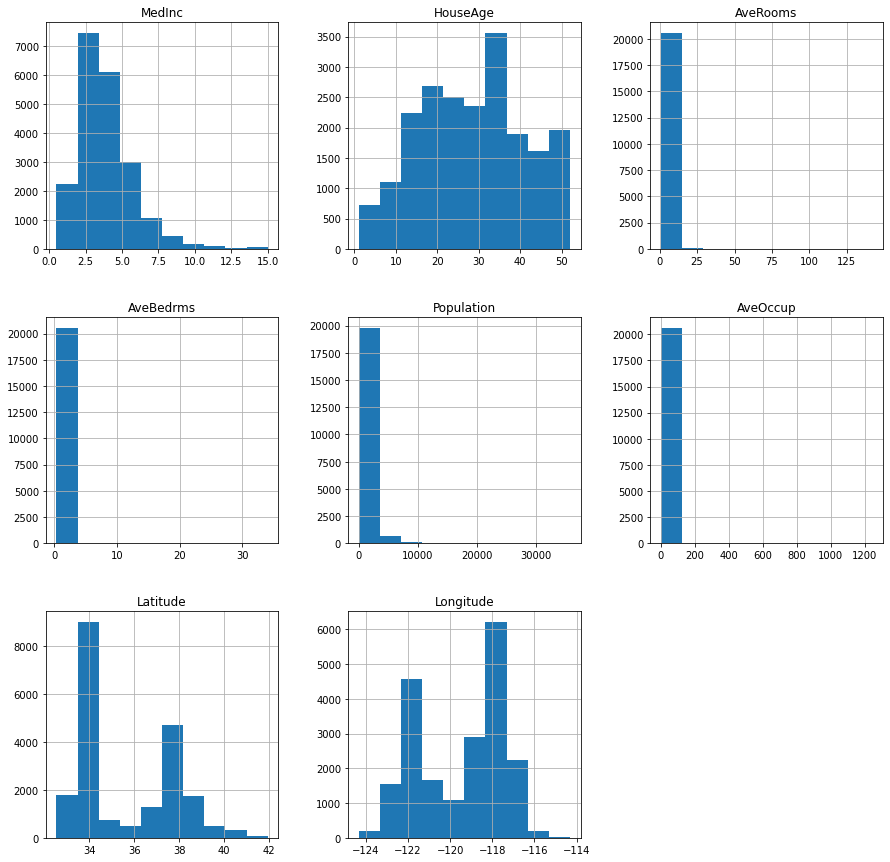

Univariate Distribution of Target


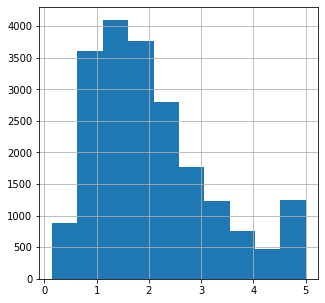

In [2]:
# spliting housing data into X and y, and graphing the univariate distribution of each feature
import matplotlib.pyplot as plt
X = housing.drop('target', axis=1)
y = housing['target']

print("Univariate Distribution of Features")
X.hist(figsize=(15,15))
plt.show()

print("Univariate Distribution of Target")
y.hist(figsize=(5,5))
plt.show()

1.2 Visualize the dependency of the target on each feature (2d scatter plot).

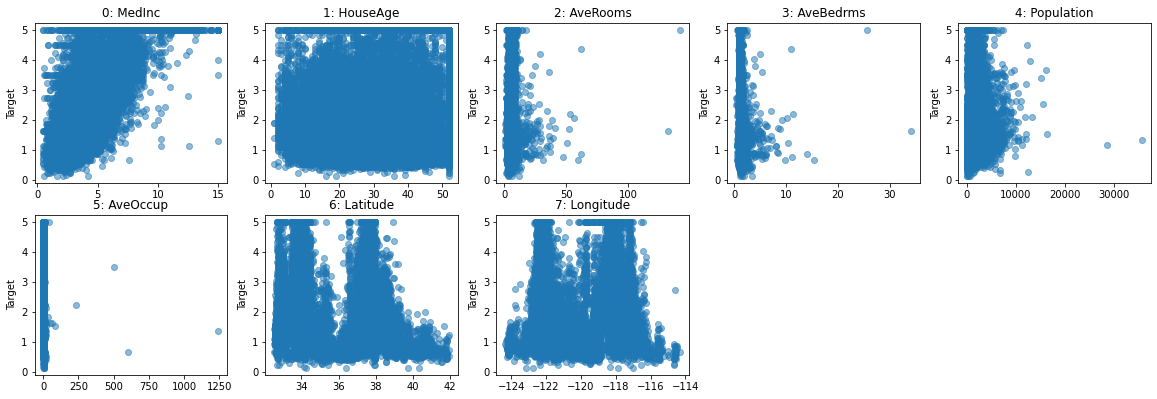

In [3]:
# plotting each feature(X) against target(y)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    ax.plot(X.iloc[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, 
    X.columns[i]))
    ax.set_ylabel("Target")

1.3 Split data in training and test set. Evaluate Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with StandardScaler help?.

In [4]:
# splitting X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1)

### OLS (Ordinary Least Square/LinearRegression)

#### Scaling does not significantly change the LinearRegression and Ridge score much because they are not distance based models, while the Lasso score got significantly worse

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)

**a) Before scale:**

In [6]:
# LinearRegression without StandardScaler scaling
from sklearn.linear_model import LinearRegression
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.6052220575559628

**b) After scale**

In [7]:
# LinearRegression with StandardScaler scaling
np.mean(cross_val_score(LinearRegression(), X_scale_train, y_train, cv=10))

0.6052220575559627

### Ridge

**a) Before scaled:**

In [8]:
# Ridge without StandardScaler scaling
from sklearn.linear_model import Ridge
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.6052379174113234

**b) After scaled**

In [9]:
# Ridge with StandardScaler scaling
np.mean(cross_val_score(Ridge(), X_scale_train, y_train, cv=10))

0.605229272011483

### Lasso

**a) Before scaled**

In [10]:
# Lasso without StandardScaler scaling
from sklearn.linear_model import Lasso
np.mean(cross_val_score(Lasso(), X_train, y_train, cv=10))

0.2853465924298559

**b) After scaled**

In [11]:
# Lasso with StandardScaler scaling
np.mean(cross_val_score(Lasso(), X_scale_train, y_train, cv=10))

-0.0005065023261151102

1.4 Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge and Lasso.

### Ridge

**a) Before scaled**

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(random_state=1), param_grid=param_grid, cv=10, return_train_score=True)

grid.fit(X_train, y_train)
print (grid.best_params_)
print (grid.best_score_)

{'alpha': 100.0}
0.6060007963847981


**b) After scaled**

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(random_state=1), param_grid=param_grid, cv=10, return_train_score=True)

grid.fit(X_scale_train, y_train)
print (grid.best_params_)
print (grid.best_score_)

{'alpha': 31.622776601683793}
0.6053517800593834


### Lasso

**a) Before scaled**

In [14]:
param_grid = {'alpha' : np.logspace(-3, 3, 13)}
grid = GridSearchCV(Lasso(max_iter=1e6, random_state=1), param_grid=param_grid, cv=10, return_train_score=True)

grid.fit(X_train, y_train)
print (grid.best_params_)
print (grid.best_score_)

{'alpha': 0.0031622776601683794}
0.6056704406162259


**b) After scaled**

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.logspace(-3, 3, 13)}
grid = GridSearchCV(Lasso(max_iter=1e6, random_state=1), param_grid=param_grid, cv=10, return_train_score=True)

grid.fit(X_scale_train, y_train)
print (grid.best_params_)
print (grid.best_score_)

{'alpha': 0.0031622776601683794}
0.6055945718811973


1.5 Visualize the coefficients of the resulting models. Do your models agree on which features are important?

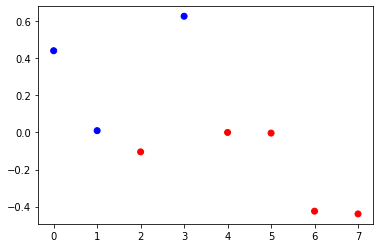

In [16]:
lr = LinearRegression().fit(X_train, y_train)

plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

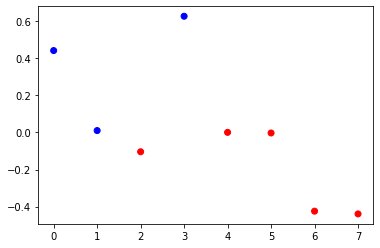

In [17]:
ridge = Ridge().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

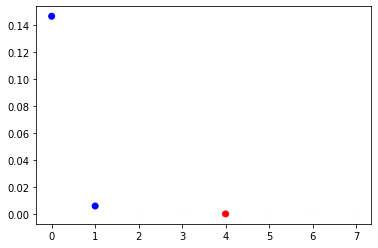

In [18]:
lasso = Lasso().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r")